In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [12]:
df = pd.read_csv("C:/Users/Windows10/Desktop/大二.5/Python ML Project/项目数据/spam.csv", encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df.rename(columns={'v1':'Label', 'v2':'Text'}, inplace = True)
df.head()

,Label,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
df['numLabel'] = df['Label'].map({'ham':0, 'spam':1})
df.head()

,Label,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,numLabel
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


In [17]:
print("# of ham : ", len(df[df.numLabel==0]), " # of spam : ", len(df[df.numLabel==1]))
print("# of total samples: ", len(df))

# of ham :  4825  # of spam :  747
# of total samples:  5572


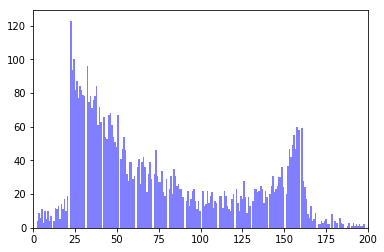

In [18]:
# 统计文本长度信息
text_lengths = [len(df.loc[i, 'Text']) for i in range(len(df))]
plt.hist(text_lengths, 1000, facecolor = 'blue', alpha = 0.5)
plt.xlim([0, 200])
plt.show()

In [19]:
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
corpus = [
...     'This is the first document.',
...     'This document is the second document.',
...     'And this is the third one.',
...     'Is this the first document?',
... ]

In [23]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [24]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [25]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.Text)
y = df.numLabel

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train.shape[0], X_test.shape[0])

4457 1115


In [27]:
# GaussianNB是先验为高斯分布的朴素贝叶斯
# MultinomialNB是先验为多项式分布的朴素贝叶斯
# BernoulliNB是先验为伯努利分布的朴素贝叶斯
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [28]:
clf = MultinomialNB(alpha=1.0, fit_prior = True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))

accuracy 0.97847533632287


In [29]:
# 混淆矩阵：TP, FP, FN, TN
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[956,  14],
       [ 10, 135]], dtype=int64)